In [1]:
import numpy as np
import pandas as pd
import nflfastpy as nfl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\Jaden\anaconda3\lib\site-packages\nflfastpy\__init__.py:16: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  default_headshot = mpl_image.imread(headshot_url)


In [2]:
#we can use nflfastpy to grab play by play (pbp) data from the years 2015-2019 season
df = pd.DataFrame()
for year in range(2015, 2020):
    yearly_df = nfl.load_pbp_data(year)
    df = pd.concat([df, yearly_df])

In [3]:
df.shape

(241193, 372)

In [4]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2015_01_BAL_DEN,2015091309,DEN,BAL,REG,1,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,2015_01_BAL_DEN,2015091309,DEN,BAL,REG,1,BAL,away,DEN,...,0,0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51,2015_01_BAL_DEN,2015091309,DEN,BAL,REG,1,BAL,away,DEN,...,0,0,-0.337139,0.691718,4.699278,3.0,0.678964,0.225919,0.456481,54.351911
3,75,2015_01_BAL_DEN,2015091309,DEN,BAL,REG,1,BAL,away,DEN,...,0,0,-0.262481,NaN,NaN,NaN,NaN,NaN,0.545905,-54.590458
4,96,2015_01_BAL_DEN,2015091309,DEN,BAL,REG,1,BAL,away,DEN,...,0,0,1.661242,1.794671,4.662650,2.0,0.712350,0.712350,0.968533,3.146732


In [5]:
#creating the filters for defining a rush
rushing_df_filters = (df['rush_attempt'] == 1) & (df['two_point_attempt'] == 0)
rushing_df = df.loc[rushing_df_filters, ['rush_attempt', 'rush_touchdown', 'yardline_100']]  #create the df with the info we want
rushing_df_probs = rushing_df.groupby('yardline_100')['rush_touchdown'].value_counts(normalize=True) #normalize to figure out the prob of touchdown
rushing_df_probs = pd.DataFrame({
    'probability_of_touchdown': rushing_df_probs.values
}, index=rushing_df_probs.index).reset_index()
rushing_df_probs = rushing_df_probs.loc[rushing_df_probs['rush_touchdown'] == 1, ['yardline_100', 'probability_of_touchdown']]
rushing_df_probs.head()

,yardline_100,probability_of_touchdown
0,1.0,0.560390
3,2.0,0.428058
5,3.0,0.336910
7,4.0,0.304251
9,5.0,0.206349


In [6]:
rushing_df.groupby('yardline_100').sum()

,rush_attempt,rush_touchdown
yardline_100,,
1.0,1333.0,747.0
2.0,556.0,238.0
3.0,466.0,157.0
4.0,447.0,136.0
5.0,504.0,104.0
...,...,...
95.0,238.0,0.0
96.0,202.0,0.0
97.0,163.0,1.0


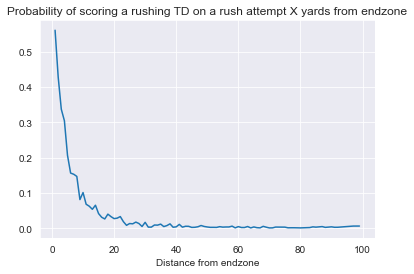

In [7]:
plt.plot(rushing_df_probs['yardline_100'], rushing_df_probs['probability_of_touchdown']);
plt.title('Probability of scoring a rushing TD on a rush attempt X yards from endzone');
plt.xlabel('Distance from endzone');

In [8]:
df_2021 = nfl.load_pbp_data(2021)

In [9]:
df_2021.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [10]:
rushing_df_2021 = df_2021.loc[df_2021['rush_attempt'] == 1, 
['rusher_id', 'rusher_player_name', 'rush_attempt','rush_touchdown', 'yardline_100']]

In [11]:
rushing_df_2021.head()

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100
2,00-0032764,D.Henry,1.0,0.0,75.0
7,00-0035228,K.Murray,1.0,0.0,23.0
10,00-0034681,C.Edmonds,1.0,0.0,9.0
18,00-0032764,D.Henry,1.0,0.0,80.0
28,00-0032764,D.Henry,1.0,0.0,75.0


In [12]:
rushing_df_2021 = rushing_df_2021.merge(rushing_df_probs, how='left', on='yardline_100')

In [13]:
rushing_df_2021

,rusher_id,rusher_player_name,rush_attempt,rush_touchdown,yardline_100,probability_of_touchdown
0,00-0032764,D.Henry,1.0,0.0,75.0,0.003111
1,00-0035228,K.Murray,1.0,0.0,23.0,0.018553
2,00-0034681,C.Edmonds,1.0,0.0,9.0,0.081081
3,00-0032764,D.Henry,1.0,0.0,80.0,0.000969
4,00-0032764,D.Henry,1.0,0.0,75.0,0.003111
...,...,...,...,...,...,...
15159,00-0033908,C.Kupp,1.0,0.0,70.0,0.000920
15160,00-0036414,C.Akers,1.0,0.0,16.0,0.031128
15161,00-0026498,M.Stafford,1.0,0.0,1.0,0.560390
15162,00-0033526,S.Perine,1.0,0.0,49.0,0.005051


In [14]:
rushing_df_2021 = rushing_df_2021.groupby('rusher_player_name', as_index=False).agg({
    'rush_touchdown': np.sum,'probability_of_touchdown': np.sum})

In [15]:
rushing_df_2021

,rusher_player_name,rush_touchdown,probability_of_touchdown
0,A.Abdullah,0.0,0.975340
1,A.Armah,0.0,0.093671
2,A.Bachman,0.0,0.003195
3,A.Brown,0.0,0.046757
4,A.Collins,2.0,2.825389
...,...,...,...
359,Z.Ertz,0.0,0.206349
360,Z.Jones,0.0,0.004080
361,Z.Moss,4.0,5.186894
362,Z.Pascal,0.0,0.044711


In [17]:
rushing_df_2021.sort_values(by='probability_of_touchdown', ascending=False).head()

,rusher_player_name,rush_touchdown,probability_of_touchdown
205,J.Taylor,20.0,18.622915
193,J.Mixon,14.0,12.791875
210,J.Williams,8.0,12.724854
162,J.Conner,16.0,11.861011
98,D.Harris,15.0,10.169964


In [18]:
rushing_df_2021['Regression'] = rushing_df_2021['rush_touchdown'] - rushing_df_2021['probability_of_touchdown']

In [25]:
rushing_df_2021['positive_regression_candidate'] = rushing_df_2021['rush_touchdown'] < rushing_df_2021['probability_of_touchdown']

In [26]:
rushing_df_2021.sort_values(by='Regression', ascending=False).head()

,rusher_player_name,rush_touchdown,probability_of_touchdown,Regression,positive_regression_candidate
116,D.Samuel,9.0,2.026692,6.973308,False
98,D.Harris,15.0,10.169964,4.830036,False
162,J.Conner,16.0,11.861011,4.138989,False
310,R.Tannehill,7.0,3.904491,3.095509,False
308,R.Penny,6.0,3.118855,2.881145,False


In [27]:
rushing_df_2021.sort_values(by='Regression', ascending=True).head()

,rusher_player_name,rush_touchdown,probability_of_touchdown,Regression,positive_regression_candidate
210,J.Williams,8.0,12.724854,-4.724854,True
267,M.Sanders,0.0,4.650704,-4.650704,True
319,S.Michel,4.0,8.082753,-4.082753,True
88,D.Cook,6.0,9.793955,-3.793955,True
13,A.Kamara,4.0,7.682172,-3.682172,True


C:\Users\Jaden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


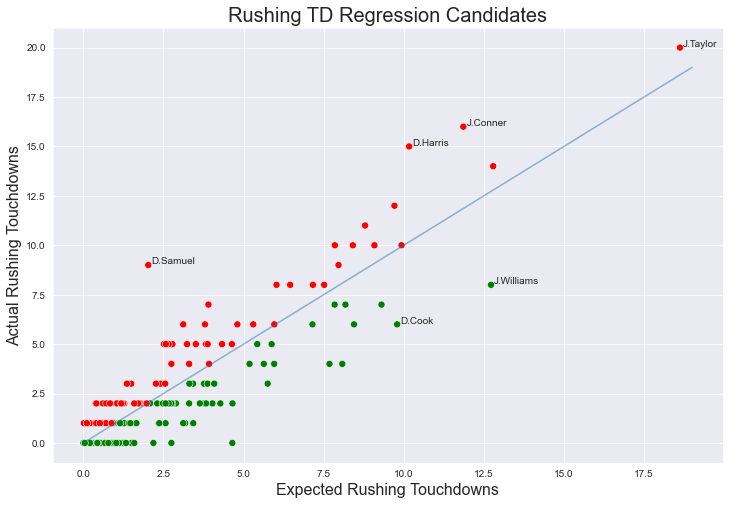

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'probability_of_touchdown',
    y = 'rush_touchdown',
    hue = 'positive_regression_candidate',
    data = rushing_df_2021,
    palette = ['r', 'g'], # red and green,
    s=50
);

max_act_touchdowns = int(rushing_df_2021['rush_touchdown'].max()) # max touchdowns
max_exp_touchdowns = int(rushing_df_2021['probability_of_touchdown'].max()) # max expected touchdowns

max_tds = max(max_act_touchdowns, max_exp_touchdowns) # max of actual and expected tds

sns.lineplot(range(max_tds), range(max_tds), alpha=0.5); # plotting a line with slope of 1 up to max_tds number. This is the blue line on our viz

# initialize a list of notable player's we'd like to annotate the visualization with.
notable_players = ['D.Samuel', 'D.Harris', 'J.Conner', 'J.Williams', 'J.Taylor','D.Cook']

for _, row in rushing_df_2021.iterrows():
    if row['rusher_player_name'] in notable_players: 
  
        ax.text(
            x = row['probability_of_touchdown']+.1, # add a bit of spacing from the point in the x-direction
            y = row['rush_touchdown'] + 0.05, # same but in the y-direction
            s = row['rusher_player_name'] # annotate with the player's name
        )
ax.get_legend().remove()
ax.set_title('Rushing TD Regression Candidates', fontsize=20)
ax.set_xlabel('Expected Rushing Touchdowns', fontsize=16)
ax.set_ylabel('Actual Rushing Touchdowns', fontsize=16);

In [37]:
for column in df.columns:
    # looking for rushing relevant columns
    if 'pass' in column:
        print(column)
    # looking for yardline and distance to endzone relevant columns
    elif 'catch' in column:
        print(column)

pass_length
pass_location
yards_after_catch
total_home_pass_epa
total_away_pass_epa
total_home_pass_wpa
total_away_pass_wpa
first_down_pass
incomplete_pass
punt_fair_catch
kickoff_fair_catch
pass_attempt
pass_touchdown
complete_pass
passer_player_id
passer_player_name
passing_yards
pass_defense_1_player_id
pass_defense_1_player_name
pass_defense_2_player_id
pass_defense_2_player_name
passer
passer_jersey_number
pass
passer_id
xpass
pass_oe


In [52]:
rec_df = df[['complete_pass', 'pass_touchdown', 'yardline_100']]
rec_df

,complete_pass,pass_touchdown,yardline_100
0,NaN,NaN,NaN
1,0.0,0.0,35.0
2,1.0,0.0,80.0
3,0.0,0.0,77.0
4,1.0,0.0,75.0
...,...,...,...
48029,0.0,0.0,NaN
48030,0.0,0.0,67.0
48031,0.0,0.0,NaN
48032,0.0,0.0,74.0


In [53]:
rec_df = rec_df.loc[(rec_df['complete_pass'] == 1)]
rec_df

,complete_pass,pass_touchdown,yardline_100
2,1.0,0.0,80.0
4,1.0,0.0,75.0
6,1.0,0.0,65.0
10,1.0,0.0,83.0
13,1.0,0.0,70.0
...,...,...,...
48003,1.0,0.0,51.0
48004,1.0,0.0,48.0
48007,1.0,1.0,5.0
48012,1.0,0.0,73.0


In [54]:
rec_df_probs = rec_df.groupby('yardline_100')['pass_touchdown'].value_counts(normalize=True)

In [55]:
rec_df_probs

yardline_100  pass_touchdown
1.0           1.0               0.926056
              0.0               0.073944
2.0           1.0               0.869919
              0.0               0.130081
3.0           1.0               0.858736
                                  ...   
97.0          0.0               0.972973
              1.0               0.027027
98.0          0.0               0.986301
              1.0               0.013699
99.0          0.0               1.000000
Name: pass_touchdown, Length: 196, dtype: float64

In [56]:
rec_df_probs = pd.DataFrame({
    'probability_of_touchdown': rec_df_probs.values
}, index=rec_df_probs.index).reset_index()

rec_df_probs.head()

,yardline_100,pass_touchdown,probability_of_touchdown
0,1.0,1.0,0.926056
1,1.0,0.0,0.073944
2,2.0,1.0,0.869919
3,2.0,0.0,0.130081
4,3.0,1.0,0.858736


In [62]:
# only keeping pass_touchdown = 1
rec_df_probs = rec_df_probs.loc[rec_df_probs['pass_touchdown'] == 1]
# let's drop the rush_touchdown as well, since that's also redundant.
rec_df_probs = rec_df_probs.drop('pass_touchdown', axis=1)
rec_df_probs.head(15)

,yardline_100,probability_of_touchdown
0,1.0,0.926056
2,2.0,0.869919
4,3.0,0.858736
6,4.0,0.774074
8,5.0,0.809859
10,6.0,0.672000
12,7.0,0.616858
14,8.0,0.515358
17,9.0,0.457516
19,10.0,0.432507


Text(0.5, 0, 'Distance from endzone')

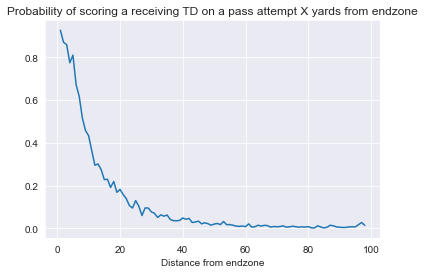

In [64]:
plt.plot(rec_df_probs['yardline_100'], rec_df_probs['probability_of_touchdown']);
plt.title('Probability of scoring a receiving TD on a pass attempt X yards from endzone');
plt.xlabel('Distance from endzone')

In [65]:
df_2021.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [73]:
for column in df_2021.columns:
    # looking for rushing relevant columns
    if 'pass' in column:
        print(column)
    # looking for yardline and distance to endzone relevant columns
    elif 'receiver' in column:
        print(column)

pass_length
pass_location
total_home_pass_epa
total_away_pass_epa
total_home_pass_wpa
total_away_pass_wpa
first_down_pass
incomplete_pass
pass_attempt
pass_touchdown
complete_pass
passer_player_id
passer_player_name
passing_yards
receiver_player_id
receiver_player_name
lateral_receiver_player_id
lateral_receiver_player_name
pass_defense_1_player_id
pass_defense_1_player_name
pass_defense_2_player_id
pass_defense_2_player_name
passer
passer_jersey_number
receiver
receiver_jersey_number
pass
passer_id
receiver_id
xpass
pass_oe


In [ ]:
#pass_touchdown, receiver_player_name, complete_pass, yardline_100

In [74]:
rec_df_2021 = df_2021.loc[df_2021['complete_pass'] == 1, 
['receiver_player_name', 'complete_pass','pass_touchdown', 'yardline_100']]

In [75]:
rec_df_2021

,receiver_player_name,complete_pass,pass_touchdown,yardline_100
3,D.Henry,1.0,0.0,78.0
6,D.Hopkins,1.0,0.0,61.0
8,C.Edmonds,1.0,0.0,31.0
9,A.Green,1.0,0.0,30.0
14,C.Kirk,1.0,0.0,24.0
...,...,...,...,...
50690,C.Kupp,1.0,0.0,46.0
50691,C.Kupp,1.0,0.0,24.0
50701,C.Kupp,1.0,1.0,1.0
50704,J.Chase,1.0,0.0,75.0


In [76]:
rec_df_2021 = rec_df_2021.merge(rec_df_probs, how='left', on='yardline_100')

In [77]:
rec_df_2021

,receiver_player_name,complete_pass,pass_touchdown,yardline_100,probability_of_touchdown
0,D.Henry,1.0,0.0,78.0,0.006831
1,D.Hopkins,1.0,0.0,61.0,0.020571
2,C.Edmonds,1.0,0.0,31.0,0.069820
3,A.Green,1.0,0.0,30.0,0.076649
4,C.Kirk,1.0,0.0,24.0,0.094937
...,...,...,...,...,...
12736,C.Kupp,1.0,0.0,46.0,0.020734
12737,C.Kupp,1.0,0.0,24.0,0.094937
12738,C.Kupp,1.0,1.0,1.0,0.926056
12739,J.Chase,1.0,0.0,75.0,0.009585


In [78]:
rec_df_2021 = rec_df_2021.groupby('receiver_player_name', as_index=False).agg({
    'pass_touchdown': np.sum,'probability_of_touchdown': np.sum})

In [79]:
rec_df_2021

,receiver_player_name,pass_touchdown,probability_of_touchdown
0,A.Abdullah,1.0,2.348959
1,A.Armah,1.0,0.926056
2,A.Auclair,1.0,0.608019
3,A.Brown,10.0,5.898286
4,A.Collins,0.0,0.194731
...,...,...,...
489,Z.Ertz,5.0,7.017609
490,Z.Gentry,0.0,1.542258
491,Z.Jones,2.0,1.989058
492,Z.Moss,1.0,1.602420


In [81]:
rec_df_2021.sort_values(by='probability_of_touchdown', ascending=False).head()

,receiver_player_name,pass_touchdown,probability_of_touchdown
86,C.Kupp,22.0,19.012112
107,D.Adams,11.0,13.148772
451,T.Hill,12.0,13.046651
460,T.Kelce,12.0,12.359455
209,H.Renfrow,9.0,11.005207


In [82]:
rec_df_2021['Regression'] = rec_df_2021['pass_touchdown'] - rec_df_2021['probability_of_touchdown']
rec_df_2021['positive_regression_candidate'] = rec_df_2021['pass_touchdown'] < rec_df_2021['probability_of_touchdown']

In [84]:
rec_df_2021.sort_values(by='Regression', ascending=False).head()

,receiver_player_name,pass_touchdown,probability_of_touchdown,Regression,positive_regression_candidate
221,J.Chase,14.0,6.965917,7.034083,False
142,D.Metcalf,12.0,5.983194,6.016806,False
195,G.Davis,11.0,5.487861,5.512139,False
336,M.Evans,16.0,10.562671,5.437329,False
3,A.Brown,10.0,5.898286,4.101714,False


In [85]:
rec_df_2021.sort_values(by='Regression', ascending=True).head()

,receiver_player_name,pass_touchdown,probability_of_touchdown,Regression,positive_regression_candidate
316,L.Fournette,2.0,6.334291,-4.334291,True
61,C.Beasley,1.0,4.963224,-3.963224,True
178,E.Elliott,2.0,5.861449,-3.861449,True
145,D.Montgomery,0.0,3.804217,-3.804217,True
74,C.Godwin,5.0,8.781273,-3.781273,True


C:\Users\Jaden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


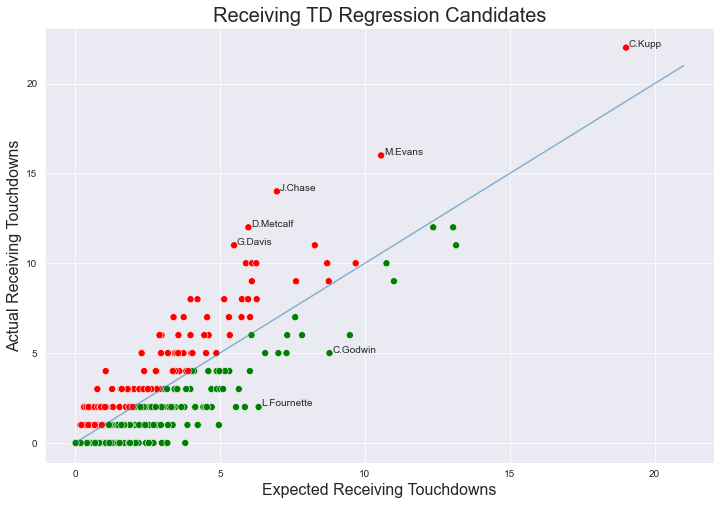

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x = 'probability_of_touchdown',
    y = 'pass_touchdown',
    hue = 'positive_regression_candidate',
    data = rec_df_2021,
    palette = ['r', 'g'], # red and green,
    s=50
);

max_act_touchdowns = int(rec_df_2021['pass_touchdown'].max()) # max touchdowns
max_exp_touchdowns = int(rec_df_2021['probability_of_touchdown'].max()) # max expected touchdowns

max_tds = max(max_act_touchdowns, max_exp_touchdowns) # max of actual and expected tds

sns.lineplot(range(max_tds), range(max_tds), alpha=0.5); # plotting a line with slope of 1 up to max_tds number. This is the blue line on our viz

# initialize a list of notable player's we'd like to annotate the visualization with.
notable_players = ['J.Chase', 'D.Metcalf', 'G.Davis', 'M.Evans', 'L.Fournette','C.Godwin', 'C.Kupp']

for _, row in rec_df_2021.iterrows():
    if row['receiver_player_name'] in notable_players: 
  
        ax.text(
            x = row['probability_of_touchdown']+.1, # add a bit of spacing from the point in the x-direction
            y = row['pass_touchdown'] + 0.05, # same but in the y-direction
            s = row['receiver_player_name'] # annotate with the player's name
        )
ax.get_legend().remove()
ax.set_title('Receiving TD Regression Candidates', fontsize=20)
ax.set_xlabel('Expected Receiving Touchdowns', fontsize=16)
ax.set_ylabel('Actual Receiving Touchdowns', fontsize=16);